<a href="https://colab.research.google.com/github/carollimaxp/data_science_alura/blob/main/DS_Bootcamp_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré Aula 1


1.   Imports
2.   Transformação dos milhares



Imports para o Módulo 2

In [578]:
#Imports - Módulo 1
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
import numpy as np
from io import StringIO

# Modulo 2 - Aula 2
import seaborn as sns

# Modulo 2 - Aula 4
import datetime

Formatação dos Reais em milhões e bilhões

In [579]:
# url https://dfrieds.com/data-visualizations/when-use-log-scale.html

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

# Aula 1

## Explorando dados do Módulo 1

### Leitura cvs

In [580]:
dados = pd.read_csv("https://raw.githubusercontent.com/carollimaxp/data_science_alura/main/Dados/A160324189_28_143_208.csv", 
                    encoding="ISO-8859-1", 
                    skiprows = 3,
                    delimiter=";",
                    skipfooter = 12,
                    thousands=".",
                    decimal=",",
                    na_values = "-")
dados.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63


### Formatando os números com duas casas decimais (float)

In [581]:
pd.options.display.float_format = "{:.2f}".format

### Criando um novo df dos dados que serão utilizados

In [582]:
#Identificando os index das colunas
colunas_usaveis = dados.mean().index.to_list()
colunas_usaveis.insert(0,"Unidade da Federação")

# Gerando df usáveis
usaveis = dados[colunas_usaveis]
usaveis.head(2)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63


Removendo colunas com NaN

In [583]:
usaveis = usaveis.dropna(axis=1)
usaveis.head(2)

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63


Transformando UF em index




In [584]:
usaveis = usaveis.set_index("Unidade da Federação")

### Df ordenado

In [585]:
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total.head(2)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,38929353900.57
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,19160106499.88


Selecionando o mes mais recente dos nosso dados

In [586]:
# selecionando o mês mais recente
mes_mais_recente = ordenado_por_total.columns[-2]
mes_mais_recente

'2020/Jul'

### Coluna com os gastos mais recentes de cada Estado

In [587]:
## retornando os gastos, por Estado, do ultimo mes
gastos_mes_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_mes_mais_recente = gastos_mes_mais_recente.sort_values(ascending=False)
gastos_mes_mais_recente.head()

Unidade da Federação
35 São Paulo           282709570.31
31 Minas Gerais        120467187.34
41 Paraná               80320852.69
43 Rio Grande do Sul    78929703.81
33 Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

### Plotar gráfico dos gastos mais recentes

###Valor Absoluto dos Gasto por Estado

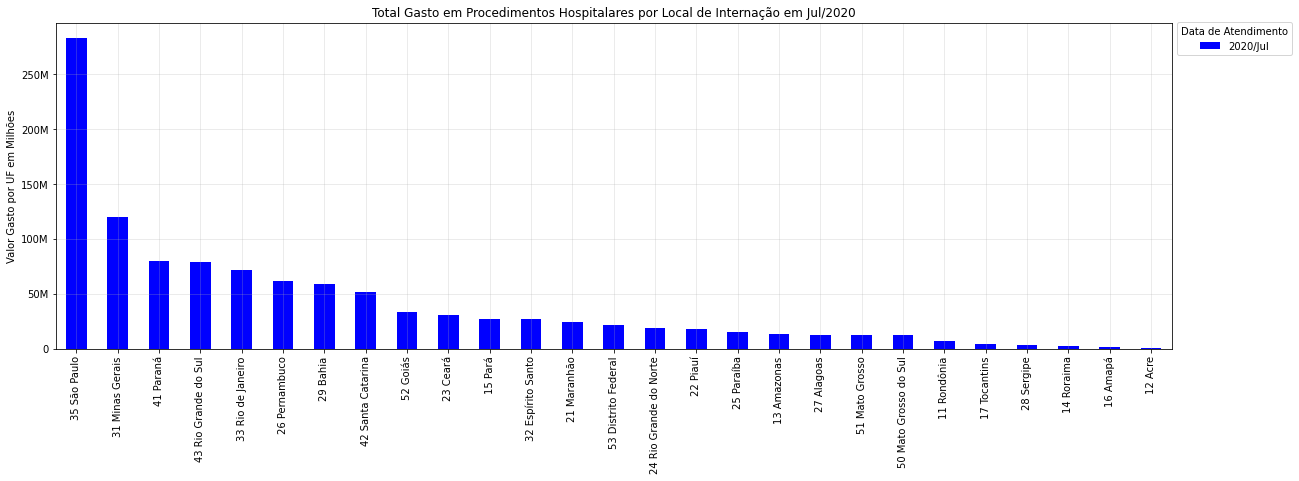

In [588]:
ax = gastos_mes_mais_recente.plot(x = "Unidade da Federação", y = '2020/Jul', kind = "bar", figsize = (20,6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.title("Total Gasto em Procedimentos Hospitalares por Local de Internação em Jul/2020") 
plt.legend(title='Data de Atendimento', bbox_to_anchor=(1, 1.017), loc='upper left')
plt.xlabel('')
plt.ylabel("Valor Gasto por UF em Milhões")
plt.grid(True, alpha = 0.3)
plt.show()

### Valor Relativo dos Gasto por Estado

In [589]:
# calculo para saber a proporção
proporcional_estado = (gastos_mes_mais_recente / gastos_mes_mais_recente.sum())*100

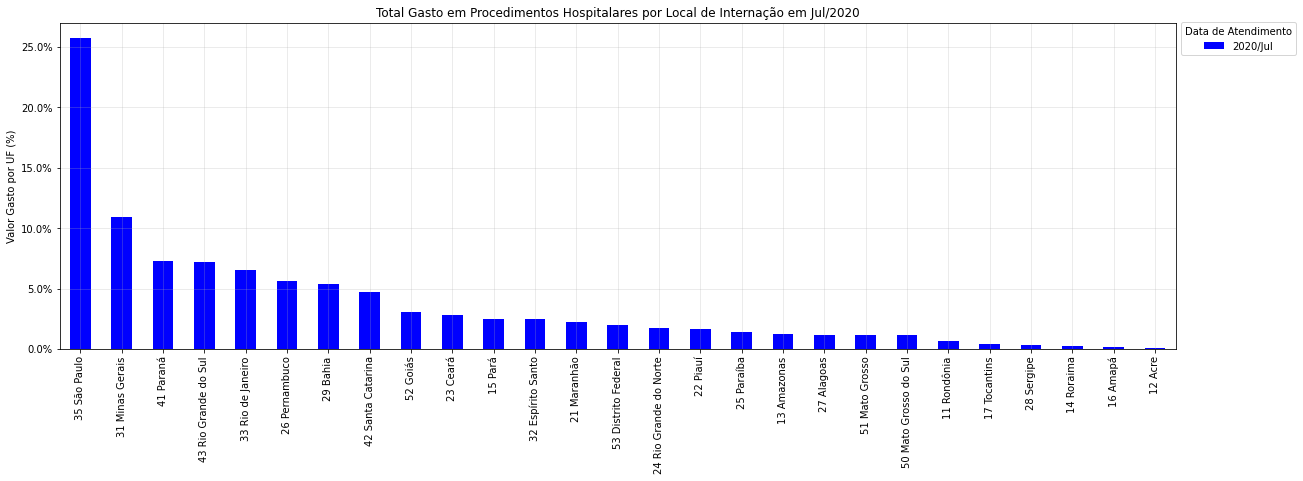

In [590]:
ax = proporcional_estado.plot(x = "Unidade da Federação", y = '2020/Jul', kind = "bar", figsize = (20,6))
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.title("Total Gasto em Procedimentos Hospitalares por Local de Internação em Jul/2020") 
plt.legend(title='Data de Atendimento', bbox_to_anchor=(1, 1.017), loc='upper left')
plt.xlabel('')
plt.ylabel("Valor Gasto por UF (%)")
plt.grid(True, alpha = 0.3)
plt.show()

## Fontes de extração dos dados

1.   IBGE - XLS
2.   Wikipedia (2 formas), a 2ª forma é o Desafio


### IBGE - formato excel

In [591]:
ibge_estimativa = pd.read_excel("https://github.com/carollimaxp/data_science_alura/raw/main/Dados/POP2020_20201030.xls", 
                    skiprows = 1,
                    skipfooter = 7,
                    thousands = '.'
                    )

ibge_estimativa = ibge_estimativa.drop("Unnamed: 1", axis=1)
ibge_estimativa.head()

,BRASIL E UNIDADES DA FEDERAÇÃO,POPULAÇÃO ESTIMADA
0,Brasil,211755692
1,Região Norte,18672591
2,Rondônia,1796460
3,Acre,894470
4,Amazonas,4207714


### [Wikipedia - URL](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)

- Copiar a tabela (Copy & Paste)


O read de vários formatos suportam o import de objetos, anteriormente estavamos importando através de links. Para a leitura de objetos, precisamos da classe StringIO. 

* Leitura de filepath (link) or buffer( usar class StringIO)
* [URL da documentação](https://pandas.pydata.org/pandas-docs/version/0.14.0/io.html#io-read-csv-table)

In [592]:
dados_populacao = StringIO("""Posição	Unidade federativa	População	% da pop. total	País comparável(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)""")

In [593]:
df_população = pd.read_csv(dados_populacao, sep = "\t")

In [594]:
df_população.head(2)

,Posição,Unidade federativa,População,% da pop. total,País comparável(habitantes)
0,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
1,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)


## **Desafio 1** : Ler essa informação direto da Wikipedia (html)

### Ler página da Wikipedia

In [595]:
dados_wikipedia = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",
                               header = 0,
                               match = "Unidade federativa"
                               )

### Transformar em um DF

In [596]:
wiki = dados_wikipedia[0]
wiki.head(2)

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)


### Formatando os dados extraídos

In [597]:
# renomear colunas ou inserir as tabelas com os nomes que queremos
wiki = wiki.rename(columns = {'Unidade federativa' : 'uf', 'População' : 'populacao', '% da pop. total' : '%pop_total'})

# wiki['uf'] = wiki['Unidade federativa']
# wiki['uf'] = wiki['População']

In [598]:
# drop colunas extras
wiki = wiki.drop(['Posição', 'País comparável (habitantes)','%pop_total'], axis=1)

In [599]:
# setar uf como index
wiki = wiki.set_index('uf')

In [600]:
# Remoção dos espaços para poder transformar em int a populacao
wiki['populacao'] = wiki['populacao'].str.split(' ').str.join('')

# Alternativa
# wiki['populacao'].str.replace(" ","")

In [601]:
# Tranformando dtype: object para int64
wiki['populacao'] = pd.to_numeric(wiki['populacao'])

In [602]:
wiki.head(2)

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666


### Juntar os gastos mais recentes dos estados com a total da população

### Formatando os Indexs

In [603]:
gastos_mes_mais_recente.index = gastos_mes_mais_recente.index.str[3:]
gastos_mes_mais_recente.head(2)

Unidade da Federação
São Paulo      282709570.31
Minas Gerais   120467187.34
Name: 2020/Jul, dtype: float64

In [604]:
wiki.index = wiki.index.str.strip()
wiki.head(2)

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666


### Join entre as estruturas (df + serie)

In [605]:
gasto_e_populacao_recente = wiki.join(gastos_mes_mais_recente)
gasto_e_populacao_recente

,populacao,2020/Jul
uf,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69
Rio Grande do Sul,11422973,78929703.81
Pernambuco,9616621,62325444.34
Ceará,9187103,30809221.22
Pará,8690745,27618727.51


## **Desafio 2** : Explorar mais métodos de String do python e str do pandas



1.   Pandas
2.   Python



### [String handling](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling)

In [606]:
# lower (letras minusculas)
# upper (letras maiusculas)
# title (primeiro caracter de cada palavra, maiuscula)
# capitalize (somente primeira letra maiuscula dentre todas as palavras)
# swapcase (troca de maiusculo para minusculo, vice-versa)
wiki.index.str.capitalize()

Index(['São paulo', 'Minas gerais', 'Rio de janeiro', 'Bahia', 'Paraná',
       'Rio grande do sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito santo', 'Paraíba',
       'Rio grande do norte', 'Mato grosso', 'Alagoas', 'Piauí',
       'Distrito federal', 'Mato grosso do sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [607]:
wiki.index.str.contains('Pa', regex=False)

array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [608]:
wiki.index.str.count('a')

Int64Index([1, 2, 1, 2, 2, 1, 1, 1, 1, 5, 2, 0, 2, 1, 3, 1, 1, 2, 1, 1, 1, 0,
            1, 1, 0, 1, 2],
           dtype='int64', name='uf')

In [609]:
#primeira letra do index
wiki.index.str.get(0)

Index(['S', 'M', 'R', 'B', 'P', 'R', 'P', 'C', 'P', 'S', 'M', 'G', 'A', 'E',
       'P', 'R', 'M', 'A', 'P', 'D', 'M', 'S', 'R', 'T', 'A', 'A', 'R'],
      dtype='object', name='uf')

In [610]:
wiki['populacao'].get(0)

46289333

In [611]:
usaveis.index.str.slice(start=3)
#usaveis.index.str[3:]

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object', name='Unidade da Federação')

Tem as funções de verificações do str. como isalnum (alphanumerico), isalpha (letras), isdigit (numero), isspace, ...

## **Desafio 3** : Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida". 

In [612]:
def limpeza_join (wiki_populacao: pd.DataFrame, gastos_mes_mais_recente: pd.Series):
    #verificar se os numeros tem espaços
    #transformar em números
    #verificar se os index estão corretos
    #formatar index
    #retorna tabela

    wiki_populacao = wiki_populacao.dropna(axis=1)
    wiki_populacao['uf'] = wiki_populacao['Unidade federativa'].str.strip()

    wiki_populacao['populacao'] = wiki_populacao['População'].str.replace(" ", "")
    wiki_populacao['populacao'] = wiki_populacao['populacao'].astype(int)

    wiki_populacao = wiki_populacao[['uf', 'populacao']]
    wiki_populacao.set_index('uf', inplace=True)

    return wiki_populacao.join(gastos_mes_mais_recente)


In [613]:
gasto_e_populacao_recente = limpeza_join (dados_wikipedia[0], gastos_mes_mais_recente)
gasto_e_populacao_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282709570.31
Minas Gerais,21292666,120467187.34
Rio de Janeiro,17366189,71540227.33
Bahia,14930634,58898100.40
Paraná,11516840,80320852.69


# Aula 2

## Explorando os dados + Lib Seaborn

In [614]:
gasto_e_populacao_recente.head(1)

,populacao,2020/Jul
uf,,
São Paulo,46289333,282709570.31


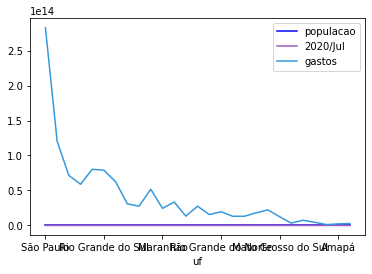

In [615]:
## Não usar 2 eixos, com duas métricas que não tem relação - dinheiro e pessoas
gasto_e_populacao_recente["gastos"] = gasto_e_populacao_recente["2020/Jul"] * 1000000
gasto_e_populacao_recente.plot()

In [616]:
#gasto_e_populacao_recente = gasto_e_populacao_recente.drop("gastos",axis=1)

### Cálculo e gráfico do gasto per capita

In [617]:
gasto_e_populacao_recente["gastos_per_capita"] = gasto_e_populacao_recente["2020/Jul"] / gasto_e_populacao_recente["populacao"]

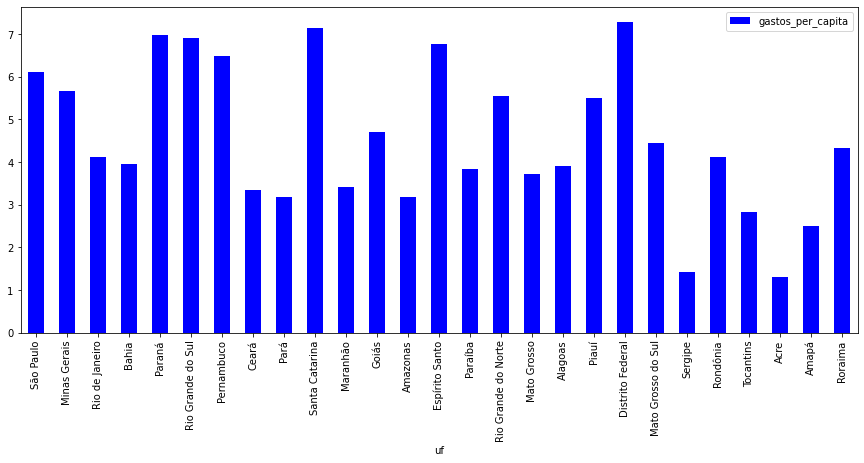

In [618]:
#gasto_e_populacao_recente.sort_values("gastos_per_capita", ascending=False)[["gastos_per_capita"]].plot(kind = 'bar', figsize = (15,6))
gasto_e_populacao_recente[["gastos_per_capita"]].plot(kind = 'bar', figsize = (15,6))

### **Lib seaborn** : Plotanto gráficos

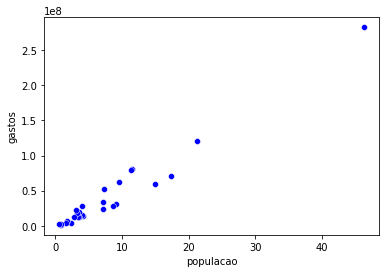

In [619]:
#import seaborn as sns
sns.scatterplot(data= gasto_e_populacao_recente/1000000, x="populacao", y="gastos")

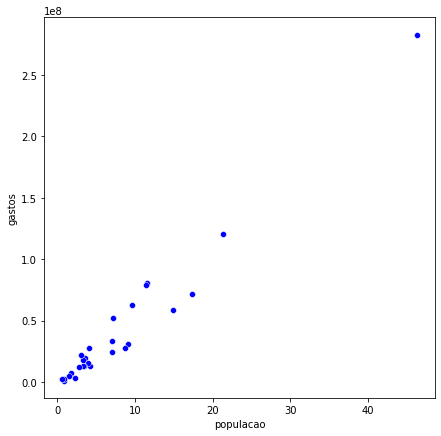

In [620]:
#import seaborn as sns
plt.figure(figsize=(7,7))
sns.scatterplot(data= gasto_e_populacao_recente/1000000, x="populacao", y="gastos")

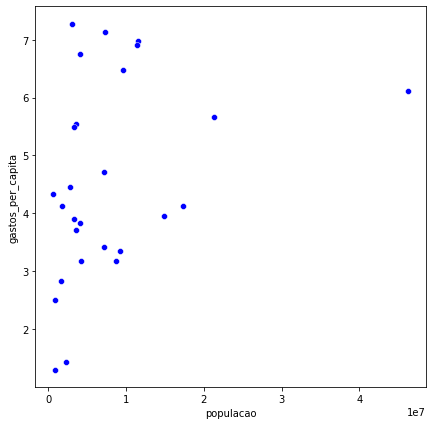

In [621]:
#import seaborn as sns
plt.figure(figsize=(7,7))
sns.scatterplot(data= gasto_e_populacao_recente, x="populacao", y="gastos_per_capita")

## **Desafio 1**: Ordenar gastos per capita por habitante. Ordenar por habitantes.

Ordenação por gasto per capita

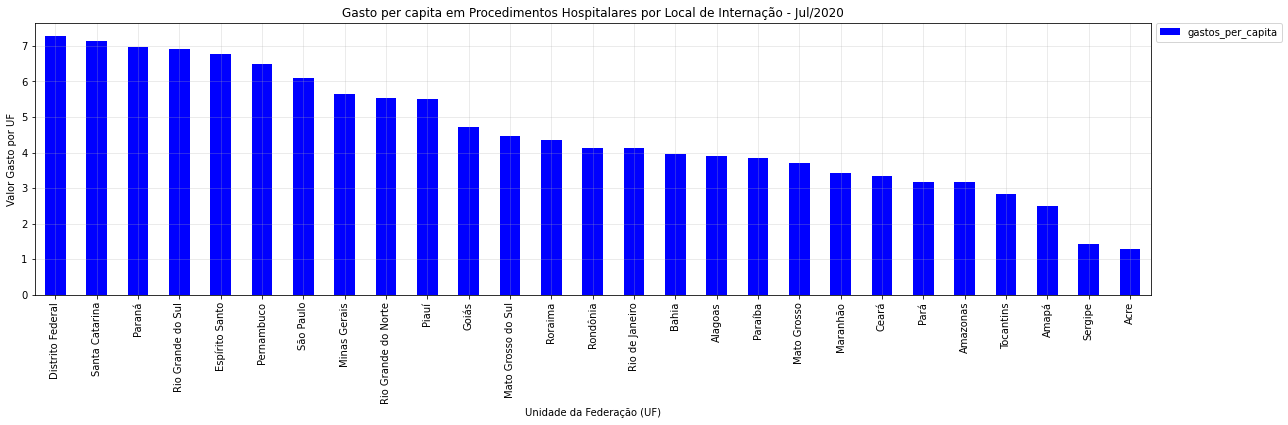

In [622]:
ax = gasto_e_populacao_recente.sort_values(["gastos_per_capita"], ascending=False)["gastos_per_capita"].plot(kind = 'bar', figsize = (20,5))
plt.title("Gasto per capita em Procedimentos Hospitalares por Local de Internação - Jul/2020") 
plt.legend(bbox_to_anchor=(1, 1.017), loc='upper left')
plt.xlabel('Unidade da Federação (UF)')
plt.ylabel("Valor Gasto por UF")
plt.grid(True, alpha = 0.3)
plt.show()

Ordenação do gasto per capita pela população

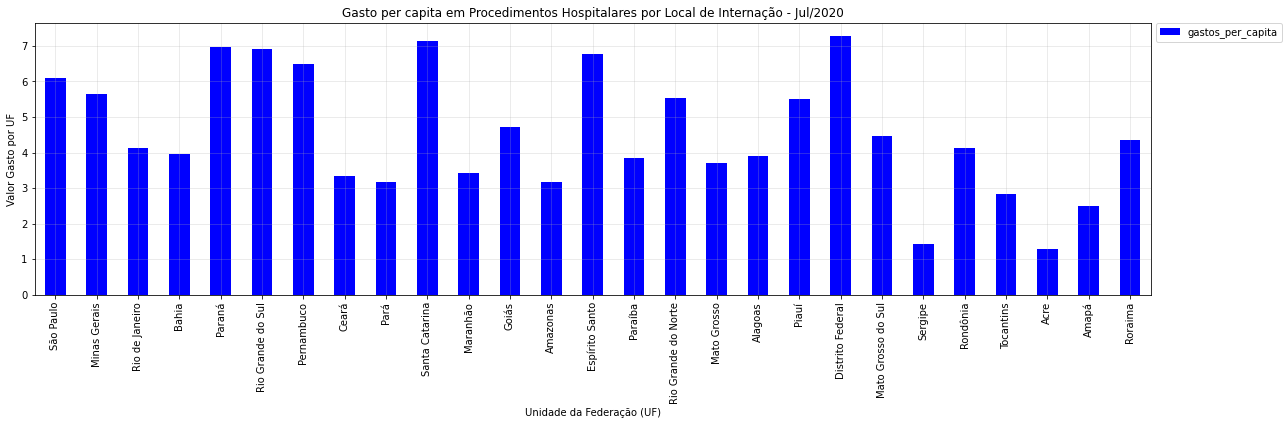

In [623]:
ax = gasto_e_populacao_recente.sort_values(["populacao"], ascending=False)["gastos_per_capita"].plot(kind = 'bar', figsize = (20,5))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.title("Gasto per capita em Procedimentos Hospitalares por Local de Internação - Jul/2020") 
plt.legend(bbox_to_anchor=(1, 1.017), loc='upper left')
plt.xlabel('Unidade da Federação (UF)')
plt.ylabel("Valor Gasto por UF")
plt.grid(True, alpha = 0.3)
plt.show()

## **Desafio 2**: fazer os ultimos gráficos para o mês anterior

### Tratamento dos dados

In [624]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]
#ordenado_por_total[:1]

In [625]:
## Função criada anteriormente
total_populacao_sorted = limpeza_join(dados_wikipedia[0], ordenado_por_total)
#total_populacao_sorted

In [626]:
penultimo_mes = total_populacao_sorted.columns[-3]
penultimo_mes

'2020/Jun'

In [627]:
gastos = total_populacao_sorted[['2020/Jun', 'populacao']]
gastos[f"percapita_2020/Jun"] = gastos["2020/Jun"] / gastos["populacao"]
#gastos[:2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Gráficos Plotados

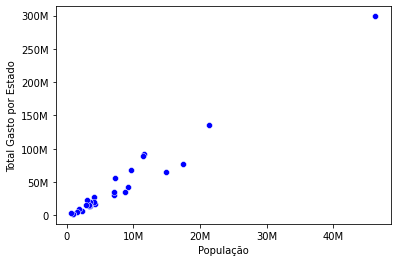

In [628]:
#import seaborn as sns
ax = sns.scatterplot(data=gastos, x="populacao", y = penultimo_mes, sizes = (720,720))#, hue = gastos.index)
#plt.legend(title='Unidade da Federação', bbox_to_anchor=(1, 1.017), loc='upper left')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.xlabel("População")
plt.ylabel("Total Gasto por Estado")
#plt.figure(figsize=(10,10))
plt.show()

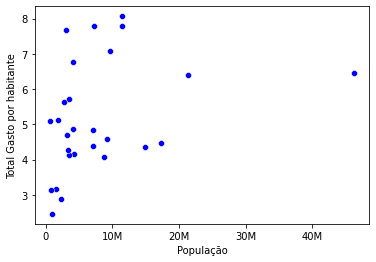

In [629]:
#import seaborn as sns
ax = sns.scatterplot(data=gastos, x= "populacao", y = "percapita_2020/Jun", sizes = (720,720))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.xlabel("População")
plt.ylabel("Total Gasto por habitante")
plt.show()

## **Desafio 3**: os ultimos gráficos com os dois meses no mesmo gráfico, diferenciando por cor

### Tratando os dados

In [630]:
penultimo_mes = ordenado_por_total.columns[-3]
mes_mais_recente = ordenado_por_total.columns[-2]

In [631]:
gastos[mes_mais_recente] = ordenado_por_total[mes_mais_recente]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [632]:

gastos[f"percapita_{mes_mais_recente}"] = gastos[mes_mais_recente] / gastos["populacao"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ordenando colunas, alguns exemplos

*  df.sort_index(axis=1, inplace=True) 
*  df = df.sort_index(axis=1) 
*  df = df.reindex(sorted(df.columns), axis=1)  



In [633]:
# como eram poucas colunas fiz do jeito mais fácil
gastos = gastos[['populacao', '2020/Jun','percapita_2020/Jun','2020/Jul', 'percapita_2020/Jul']]
gastos[:1]

,populacao,2020/Jun,percapita_2020/Jun,2020/Jul,percapita_2020/Jul
uf,,,,,
São Paulo,46289333,299060851.62,6.46,282709570.31,6.11


Criando uma função para automatizar o inserção da coluna gastos (Ano/Mês) e gasto_per_capita

In [634]:
# gastos = destino
# ordenado_por_total = origem

def insere_gastototal_percapita (dados_origem : pd.DataFrame, dados_destino: pd.DataFrame, mes:str):
  dados_destino[f"{mes}"] = dados_origem[mes]
  dados_destino[f"percapita_{mes}"] = dados_origem[mes] / dados_destino['populacao']
  dados_destino.sort_index(axis=1, inplace=True, ascending=False)

Teste

In [635]:
#Maio
insere_gastototal_percapita (ordenado_por_total, gastos, ordenado_por_total.columns[-4])
gastos[:1]

,populacao,percapita_2020/Mai,percapita_2020/Jun,percapita_2020/Jul,2020/Mai,2020/Jun,2020/Jul
uf,,,,,,,
São Paulo,46289333,6.54,6.46,6.11,302857660.98,299060851.62,282709570.31


In [636]:
#Abril
insere_gastototal_percapita (ordenado_por_total, gastos, ordenado_por_total.columns[-5])
gastos[:1]

,populacao,percapita_2020/Mai,percapita_2020/Jun,percapita_2020/Jul,percapita_2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Abr
uf,,,,,,,,,
São Paulo,46289333,6.54,6.46,6.11,5.44,302857660.98,299060851.62,282709570.31,251696362.66


### Plotando os gráficos

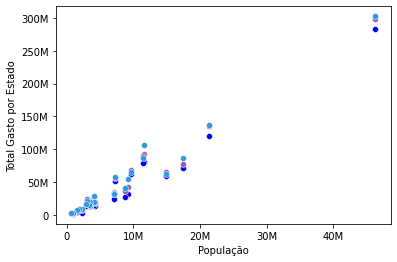

In [637]:
#import seaborn as sns
ax = sns.scatterplot(data=gastos, x="populacao", y = '2020/Jul', sizes = (720,720))#, hue = gastos.index)
ax = sns.scatterplot(data=gastos, x="populacao", y = '2020/Jun', sizes = (720,720))#, hue = gastos.index)
ax = sns.scatterplot(data=gastos, x="populacao", y = '2020/Mai', sizes = (720,720))#, hue = gastos.index)
#plt.legend(title='Unidade da Federação', bbox_to_anchor=(1, 1.017), loc='upper left')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.xlabel("População")
plt.ylabel("Total Gasto por Estado")
#plt.figure(figsize=(10,10))
plt.show()

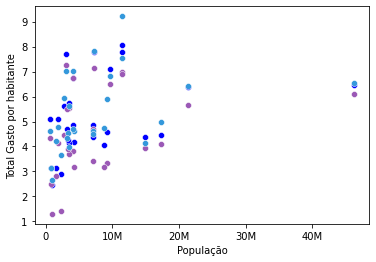

In [638]:
#import seaborn as sns
ax = sns.scatterplot(data=gastos, x= "populacao", y = "percapita_2020/Jun", sizes = (720,720))
ax = sns.scatterplot(data=gastos, x= "populacao", y = "percapita_2020/Jul", sizes = (720,720))
ax = sns.scatterplot(data=gastos, x= "populacao", y = "percapita_2020/Mai", sizes = (720,720))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.xlabel("População")
plt.ylabel("Total Gasto por habitante")
plt.show()

## **Desafio 4**: Analise os gráficos e tente chegar a hipóteses que explicam o que está entendendo dos dados. Lembre-se que a conclusão é uma hipótese que esses dados serão alterados.

### Analisando outras visões dos gráficos

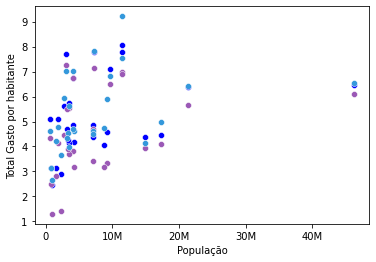

In [639]:
#import seaborn as sns
ax = sns.scatterplot(data=gastos, x= "populacao", y = "percapita_2020/Jun", sizes = (720,720))
ax = sns.scatterplot(data=gastos, x= "populacao", y = "percapita_2020/Jul", sizes = (720,720))
ax = sns.scatterplot(data=gastos, x= "populacao", y = "percapita_2020/Mai", sizes = (720,720))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
#plt.legend(title='Unidade da Federação', bbox_to_anchor=(1, 1.017), loc='upper left')
plt.xlabel("População")
plt.ylabel("Total Gasto por habitante")
plt.show()

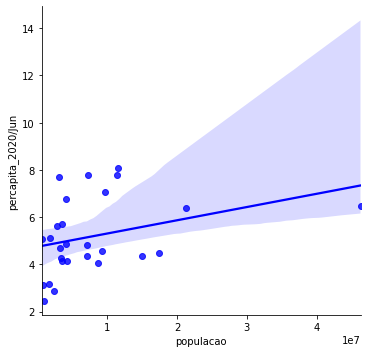

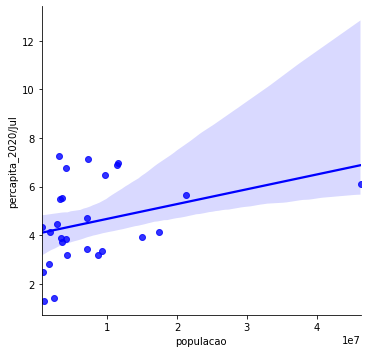

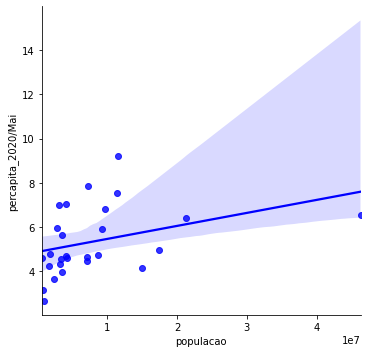

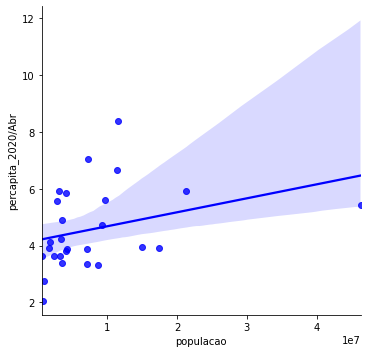

In [640]:
sns.lmplot(data=gastos, x= "populacao", y = "percapita_2020/Jun")
sns.lmplot(data=gastos, x= "populacao", y = "percapita_2020/Jul")
sns.lmplot(data=gastos, x= "populacao", y = "percapita_2020/Mai")
sns.lmplot(data=gastos, x= "populacao", y = "percapita_2020/Abr")

### Dados para resposta abaixo

In [641]:
gastos['total_percapita'] = gastos[gastos.columns[1:5]].sum(axis=1)
ordernado_percapita = gastos.sort_values('total_percapita', ascending= False)
ordernado_percapita.sort_index(axis=1, inplace=True, ascending=False)

In [642]:
ordernado_percapita[:3]

,total_percapita,populacao,percapita_2020/Mai,percapita_2020/Jun,percapita_2020/Jul,percapita_2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Abr
uf,,,,,,,,,,
Paraná,32.65,11516840,9.21,8.07,6.97,8.40,106103737.62,92901461.36,80320852.69,96727112.19
Santa Catarina,29.82,7252502,7.84,7.79,7.14,7.06,56843604.33,56503747.99,51764534.76,51179993.45
Rio Grande do Sul,28.92,11422973,7.54,7.79,6.91,6.68,86076113.42,89019478.82,78929703.81,76294596.96


In [643]:
colunas_usaveis = ordernado_percapita.columns[0:6]
colunas_usaveis = colunas_usaveis.drop('populacao')
colunas_usaveis

Index(['total_percapita', 'percapita_2020/Mai', 'percapita_2020/Jun',
       'percapita_2020/Jul', 'percapita_2020/Abr'],
      dtype='object')

### Pq o total por habitante, o estado que ficou em 1º lugar foi Paraná?  

Eu li alguns artigos de saúde, pq eu não estava conseguindo acessar o Tabnet DataSUS... Eu vi algumas variáveis que influenciaram no valor por habitante, que pode ser

*   Nível de Complexidade nos procedimento (Muitas cirurgias no SUL)
*   Tempo de permanencia de internação complexas
*   Quantidade de hospitais de médio (mais de 100 leitos) e grande porte (mais de 200 leitos), nesses leitos não são contabilizados leitos de longa duração e leitos hospital-dia
*   Quantidade de leitos disponíveis por 1000 habitantes
*   A região Sul tem as maiores taxas de internação
*   Melhor qualidade e efetividade da atenção hospitalar (segundo o estudo, por isso eles internam mais e mais rápido)

obs: Os leitos de longa permanência abrangem leitos das seguintes categorias: crônicos, psiquiatria, reabilitação, tisiologia e acolhimento noturno


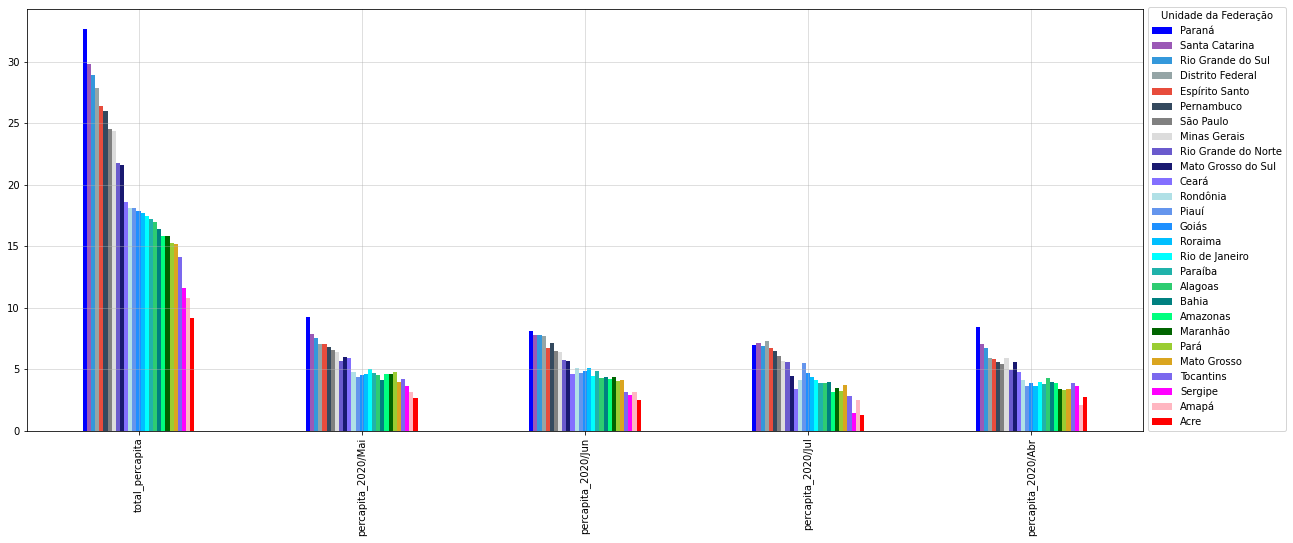

In [644]:
ax = ordernado_percapita[colunas_usaveis].T.plot(kind = "bar", figsize = (20,7.75))
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1, 1.017), loc='upper left')

plt.grid(True, alpha = 0.5)

Houve uma redução dos valores por habitante, algumas das explicações 

*   Maior quantidade de campanhas preventivas e políticas públicas com relação a saúde da família
*   Procedimentos de prevenções são menos custosos que os mais intensivos

* Na região Norte e Nordeste, o valor está se aproximando do valor médio por habitante, o principal motivo aumento da quantidade de hospitais do SUS nas regiões para todas as complexidades e de todos os portes.


Estamos caminhando para um valor de internação por habitante mais igualitário ou menos discrepando no Brasil.


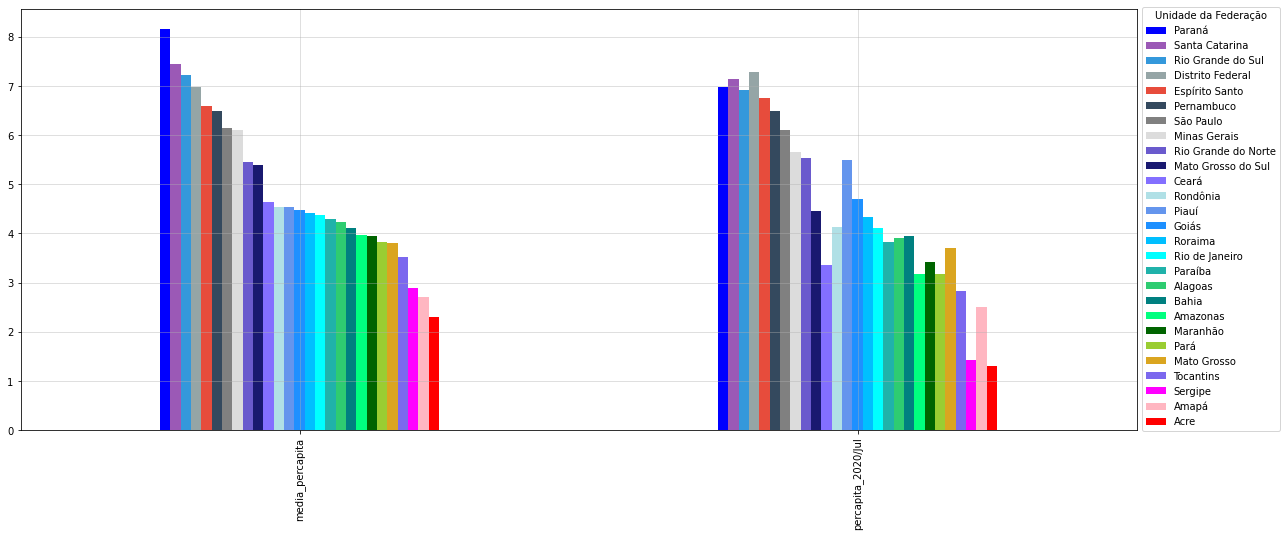

In [645]:
ordernado_percapita['media_percapita'] = ordernado_percapita['total_percapita'] / 4
ax = ordernado_percapita[['media_percapita', 'percapita_2020/Jul']].T.plot(kind = "bar", figsize = (20,7.75))
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1, 1.017), loc='upper left')

plt.grid(True, alpha = 0.5)

# Aula 3

### Plotar por Estado

In [646]:
colunas_usaveis = ordenado_por_total.columns.drop('Total')
colunas_usaveis = colunas_usaveis.drop(colunas_usaveis[0:6])
colunas_usaveis

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=150)

In [647]:
mensal = ordenado_por_total[colunas_usaveis].T
mensal = mensal

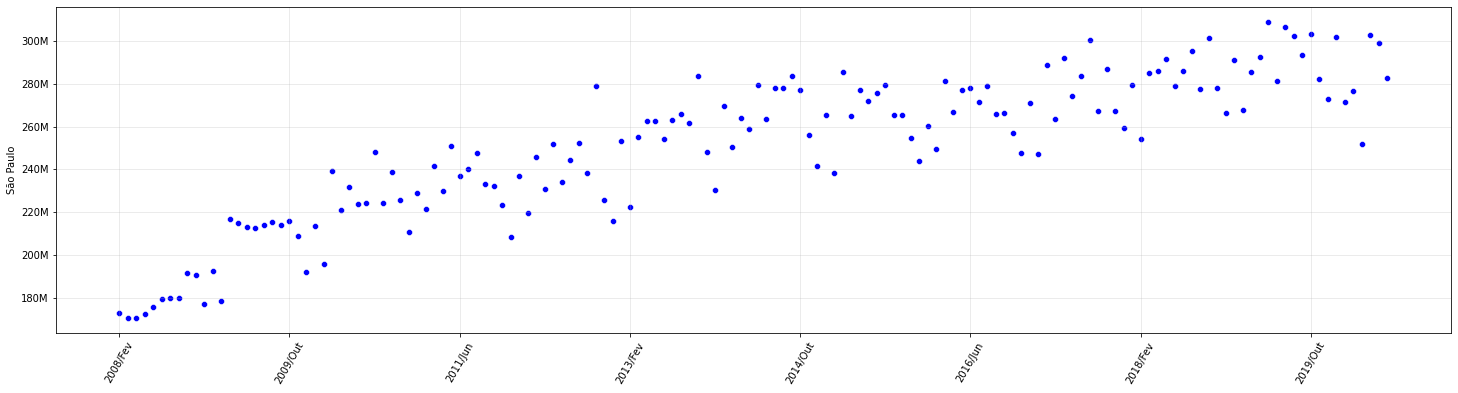

In [648]:
plt.figure(figsize=(25,6))
plt.xticks(rotation = 60)
plt.grid(True, alpha = 0.3)
ax = sns.scatterplot(data = mensal, x = mensal.index, y= 'São Paulo' )
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

# Automaticamente escolhe os indices para mostrar no eixo X
ax.xaxis.set_major_locator(ticker.AutoLocator())

plt.show()

### **Desafio 1 e 2**: Plotar os gráficos da Aula para seu estado

1.   Escala em milhões
2.   Título no gráfico
3.   Título nos eixos
4.   Alterar o tamanho do título



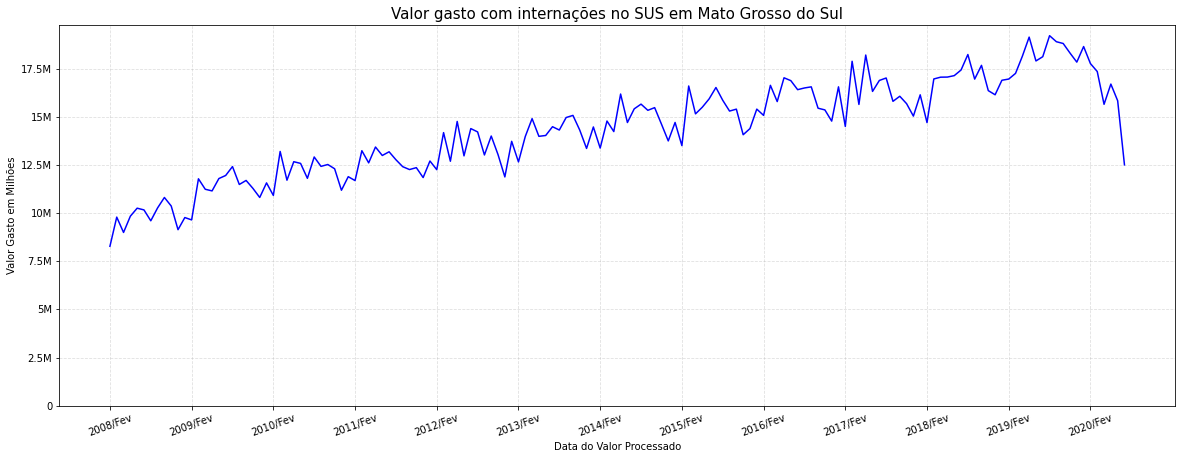

In [649]:
plt.figure(figsize=(20,7))
plt.xticks(rotation = 20)
plt.grid(True, alpha = 0.4, linestyle = "--")

ax = sns.lineplot(data = mensal, x = mensal.index, y= 'Mato Grosso do Sul')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

# A cada 12 doze meses, colocar um ticker
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

plt.title ('Valor gasto com internações no SUS em Mato Grosso do Sul', fontsize = 15)
plt.xlabel ('Data do Valor Processado')
plt.ylabel ('Valor Gasto em Milhões')

plt.ylim(bottom = 0)
plt.show()


# Aula 4

## De String para Datetime/Date

In [650]:
meses = { 

    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes : str):
    ano: int = int(ano_mes[:4])
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes]
    return datetime.date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


## Plotando o gráfico

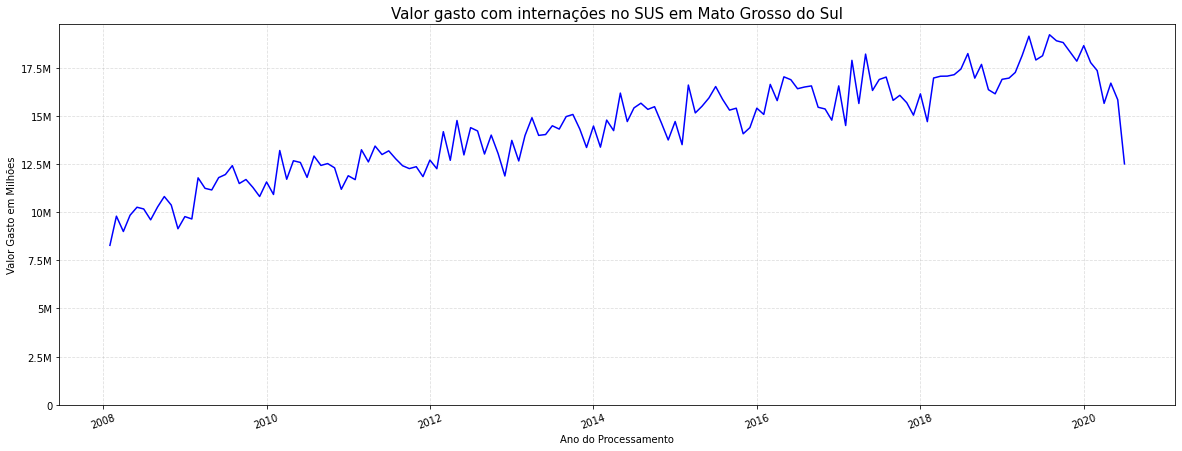

In [651]:
plt.figure(figsize=(20,7))
plt.xticks(rotation = 20)
plt.grid(True, alpha = 0.4, linestyle = "--")

ax = sns.lineplot(data = mensal, x = mensal.index, y= 'Mato Grosso do Sul')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))

# A cada 12 doze meses, colocar um ticker
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))

plt.title ('Valor gasto com internações no SUS em Mato Grosso do Sul', fontsize = 15)
plt.xlabel ('Ano do Processamento')
plt.ylabel ('Valor Gasto em Milhões')

plt.ylim(bottom = 0)
plt.show()

## Explorando os **dados**

In [652]:
mensal_sem_index = mensal.reset_index().melt(id_vars = ['index'], value_vars = mensal.columns)
mensal_sem_index.columns = ['data', 'uf', 'gasto']
mensal_sem_index.head()

,data,uf,gasto
0,2008-02-01,São Paulo,172834914.73
1,2008-03-01,São Paulo,170481849.56
2,2008-04-01,São Paulo,170278285.95
3,2008-05-01,São Paulo,172402180.59
4,2008-06-01,São Paulo,175416595.83


## **Desafio 1**: voltar atrás, partindo do mensal_sem_index para o mensal

In [653]:
mensal_sem_index.pivot_table(values='gasto', index='data', columns='uf')

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
data,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1743978.66,8112220.30,1275063.72,7934652.10,33410124.06,27643304.86,10215956.80,10032886.43,18149374.27,13452263.93,7929894.93,8279288.79,70301089.50,48855046.46,10871589.62,20126081.01,26222079.10,9711680.20,9110108.87,45897704.82,44122593.19,1940792.63,771687.83,24409572.92,4636850.76,172834914.73,5051932.07
2008-03-01,2057439.02,9210505.56,1177745.93,8641517.13,41301703.40,30085370.22,11627918.26,12262049.08,20992213.03,14750895.33,9416367.68,9793888.78,79119005.51,55611791.07,12348758.14,22149375.82,30716361.81,10428191.09,10126626.54,52928695.92,42892665.52,1955721.68,876091.18,27483480.50,5017838.07,170481849.56,5200151.87
2008-04-01,2057829.69,10466691.94,1396371.51,8531576.49,42826993.62,31376221.00,11922015.36,12453466.98,21049477.30,15148647.11,9390588.03,8997542.75,79046322.41,56115135.82,12680965.13,23436682.75,30589332.79,10227943.00,10964234.85,51972416.77,45295962.86,2143353.81,896952.53,27806641.44,5265951.03,170278285.95,5343714.73
2008-05-01,2226577.93,9844096.03,1411520.77,9079902.15,42071294.17,31189904.62,11900817.00,11789786.09,19162546.79,14543679.92,9378197.25,9842108.59,79268070.12,55574831.93,13258411.71,23861080.80,31409553.23,10562148.66,11032871.23,51679350.79,43951349.46,2280382.58,1027288.73,28354279.52,5367094.94,172402180.59,5344487.99
2008-06-01,2112576.82,10288668.11,1420892.01,8646295.77,39910042.40,29463965.11,11969271.76,11889687.35,20332533.92,14553978.06,9450300.60,10257782.00,79608652.53,56094754.74,12246686.33,23502915.90,28947510.92,10465088.93,10450599.08,53759674.01,44102925.77,2624542.97,938293.54,28993292.76,4981036.36,175416595.83,5398413.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,2859102.06,15998721.86,2286241.46,14773739.41,70340301.29,46395356.97,19405446.88,26555688.68,34558308.52,28832662.46,14444207.60,17357008.80,147078556.29,114476997.52,17607478.01,34749098.46,59628674.07,15318975.43,20936692.02,84651396.59,73594497.93,7174312.31,2813954.05,56709962.09,9193248.73,276606288.92,7025821.12
2020-04-01,2472063.08,14241361.44,1774558.12,16330913.81,59109689.20,43468816.62,18123899.78,23735724.64,27499307.93,23938156.77,11943713.53,15652772.51,126330649.86,96727112.19,15386630.89,28714969.96,53843729.23,11878587.16,17319947.66,76294596.96,68160773.35,7423678.64,2304961.42,51179993.45,8395906.57,251696362.66,6204453.42
2020-05-01,2383895.48,15254204.31,2701014.87,19441150.53,61756775.71,54200339.48,21437430.22,28614683.75,31870107.62,32979447.97,13981483.29,16703851.10,136867275.75,106103737.62,18970543.57,41248502.78,65424719.40,14175053.45,19916570.52,86076113.42,86281033.16,8581195.13,2910776.44,56843604.33,8450209.57,302857660.98,6732370.56


## Plotando gráfico do df com melt

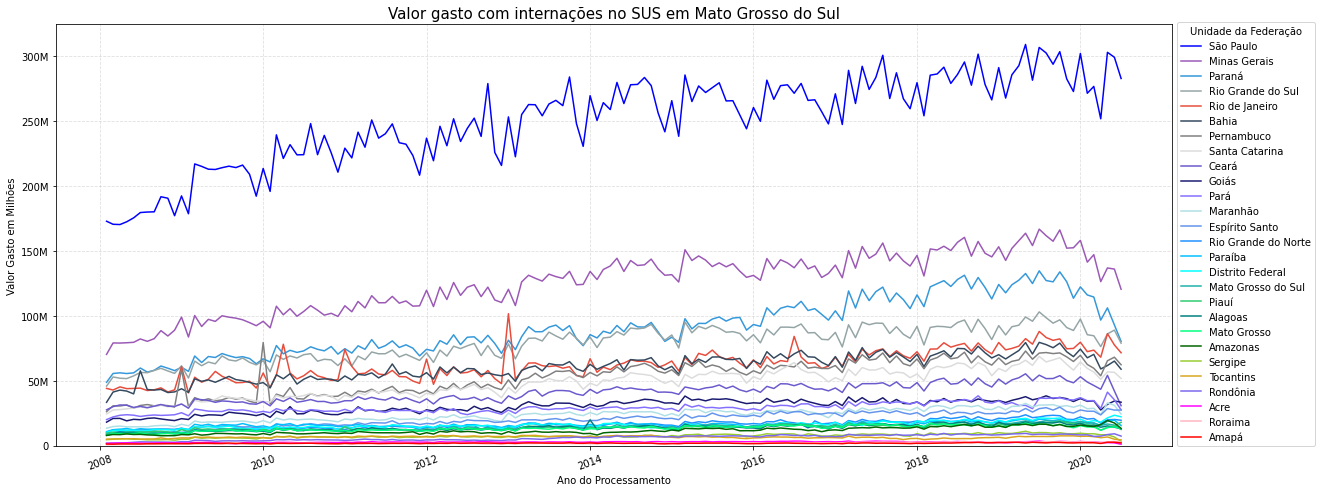

In [654]:
plt.figure(figsize=(20,7.75))
plt.xticks(rotation = 20)
plt.grid(True, alpha = 0.4, linestyle = "--")

ax = sns.lineplot(data = mensal_sem_index, x = 'data', y= 'gasto', hue='uf')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1, 1.017), loc='upper left')
plt.title ('Valor gasto com internações no SUS em Mato Grosso do Sul', fontsize = 15)
plt.xlabel ('Ano do Processamento')
plt.ylabel ('Valor Gasto em Milhões')

plt.ylim(bottom = 0)
plt.show()

## **Desafio 2** : Melhorar o gráfico anterior

*   Muitos estados, escolha os estados (TOP 5 do Valor gasto)
*   [Palette de cores](https://seaborn.pydata.org/tutorial/color_palettes.html)
*   Posição legenda
*   Título principal e para os eixos


In [ ]:
mensal_top5 = mensal.reset_index().melt(id_vars = ['index'], value_vars = mensal.columns[:5])
mensal_top5.columns = ['data', 'uf', 'gasto']
#mensal_top5.head()

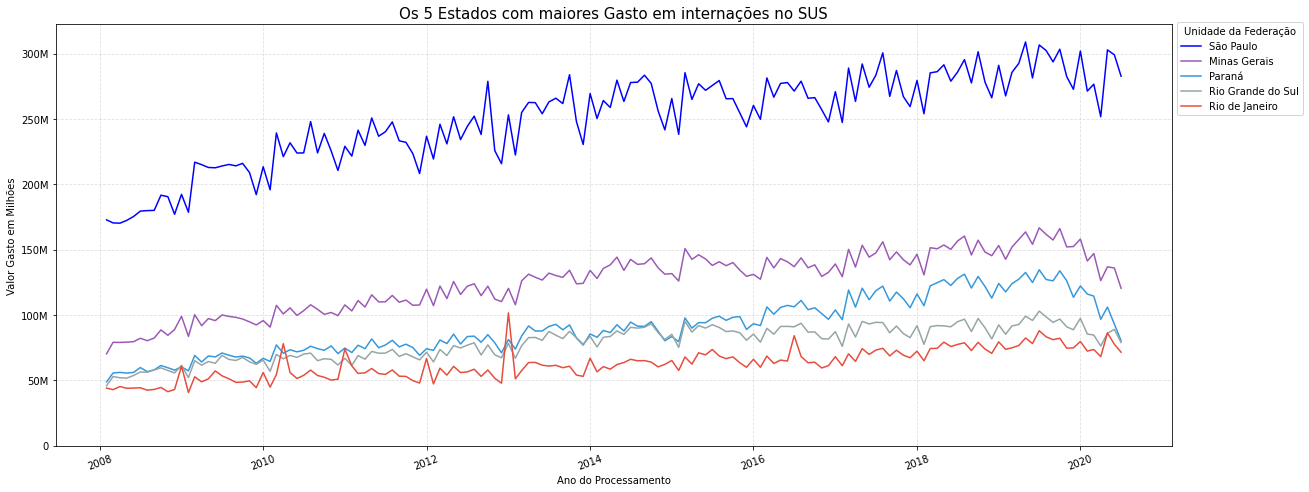

In [667]:
plt.figure(figsize=(20,7.75))
plt.xticks(rotation = 20)
plt.grid(True, alpha = 0.4, linestyle = "--")

cor_uf = [ "#0000FF", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", 
           "#808080", "#DCDCDC", "#6A5ACD", "#191970", "#836FFF", "#B0E0E6",
           "#6495ED", "#1E90FF", "#00BFFF", "#00FFFF", "#20B2AA", "#2ecc71",
           "#008080", "#00FF7F", "#006400", "#9ACD32", "#DAA520", "#7B68EE",
           "#FF00FF", "#FFB6C1", "#FF0000", "#FFFF00", "#D8BFD8", "#000000"
          ] #30 cores

ax = sns.lineplot(data = mensal_top5, x = 'data', y= 'gasto', hue='uf')
sns.set_palette(cor_uf)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1, 1.017), loc='upper left')
plt.title ('Os 5 Estados com maiores Gasto em internações no SUS', fontsize = 15)
plt.xlabel ('Ano do Processamento')
plt.ylabel ('Valor Gasto em Milhões')
plt.ylim(bottom = 0)
plt.show()

# Aula 5

# Aula 6